# Preparation

Peparation biasa dilakukan untuk mempersiapkan data sebelum masuk dalam tahap pemodelan. <br>
Berikut adalah tahapan yang akan dilalui pada data `Cluster S1.csv` (sebuah data yang di-generate secara random) sebelum tahap pemodelan :
1. Import Library
2. Read Dataset
3. Pencarian Model CLuster Terbaik
4. Prosws Clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster
from sklearn.metrics import silhouette_score


In [ ]:
#Proses pembacaan data dari Sumber
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/cluster_s1.csv')
data.head()

,no,x,y
0,NaN,664159,550946
1,NaN,665845,557965
2,NaN,597173,575538
3,NaN,618600,551446
4,NaN,635690,608046


In [ ]:
#drop data yang tidak diperlukan perlu
data=data.drop('no', axis = 1)
data.head()

,x,y
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


In [ ]:
data.shape

(5000, 2)

In [ ]:
data.describe()

,x,y
count,5000.000000,5000.000000
mean,514937.556600,494709.292800
std,244465.901926,235840.852969
min,19835.000000,51121.000000
25%,320352.500000,320107.750000
50%,505338.500000,526259.500000
75%,786228.750000,713713.500000
max,961951.000000,970756.000000


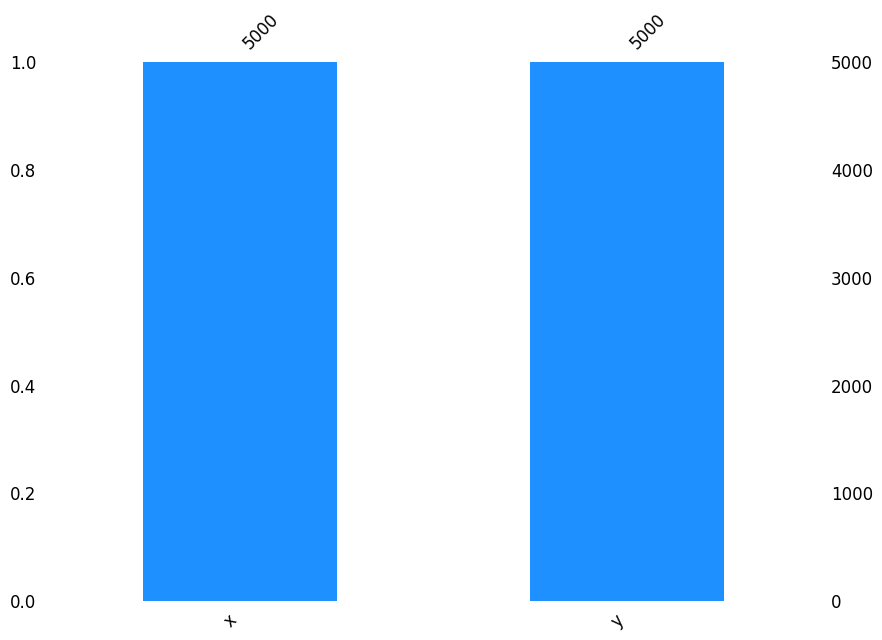

In [ ]:
# missing value
import missingno
miss = pd.DataFrame({"Missing Value": data.isna().sum()})
miss[miss["Missing Value"]> 0]
# plot to visualize the missing value proportion
missingno.bar(data,color="dodgerblue", sort="ascending", figsize=(10,7), fontsize=12)
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
data_pca = pca.fit_transform(data)

pca.n_components_

2

In [ ]:
data_pca.shape

(5000, 2)

In [ ]:
data_pca

array([[-107942.94515457,  117379.41471329],
       [-106289.46978074,  124406.14768019],
       [ -37056.80010781,  109191.30745892],
       ...,
       [  43777.64946489,  388418.48978055],
       [  88178.30458954,  363167.9601722 ],
       [   5508.1202261 ,  386764.57538104]])

In [ ]:
#Lakukan Scaler dan/atau Noermalisasi jika diperlukan
from sklearn.preprocessing import StandardScaler

#START CODE
scaler = StandardScaler()
X_transform= pd.DataFrame(data_pca,columns=["data1","data2"])

In [ ]:
X_transform

,data1,data2
0,-107942.945155,117379.414713
1,-106289.469781,124406.147680
2,-37056.800108,109191.307459
3,-67034.088509,97321.051645
4,-56821.209990,155556.137395
...,...,...
4995,27294.941122,388520.860163
4996,8230.138596,409353.686054
4997,43777.649465,388418.489781
4998,88178.304590,363167.960172


array([[<AxesSubplot: title={'center': 'data1'}>,
        <AxesSubplot: title={'center': 'data2'}>]], dtype=object)

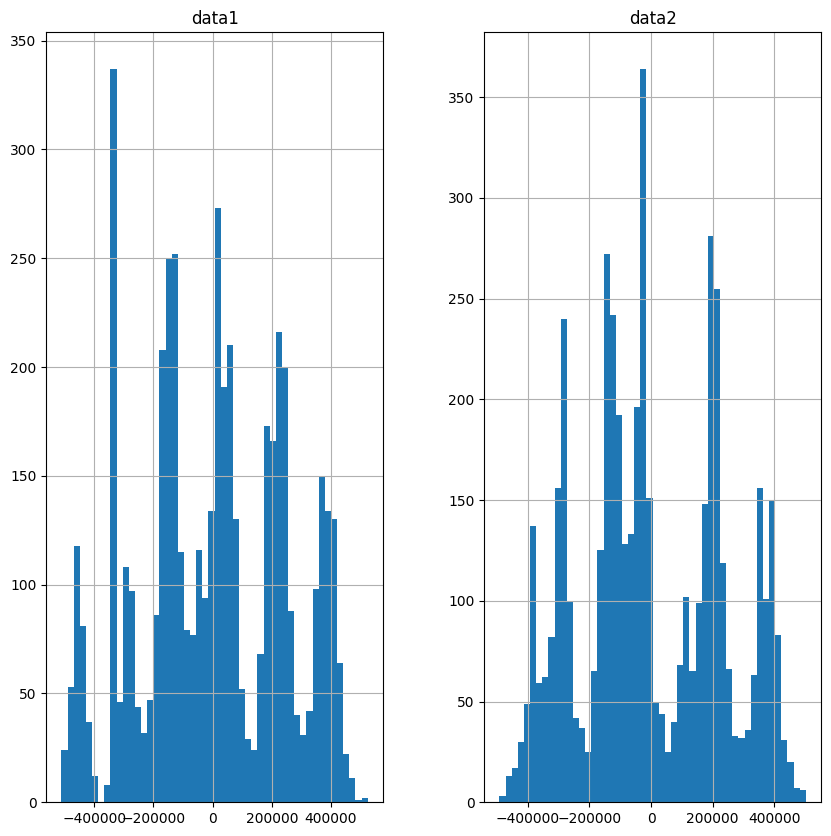

In [ ]:
X_transform.hist(bins=50,figsize=(10,10))

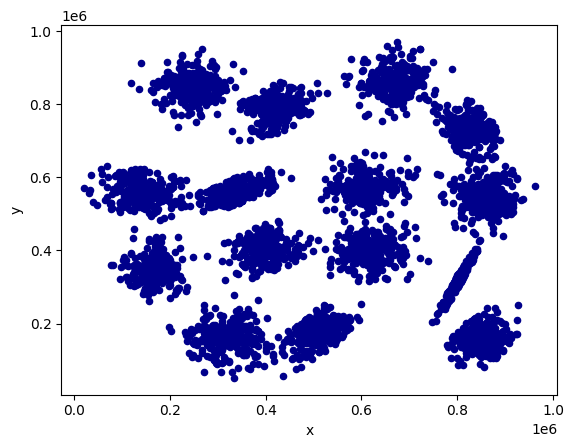

In [ ]:
#Lakukan Visualisasi
#Kita plot biar datanya terlihat

%matplotlib inline
ax1 = data.plot.scatter(x='x',y='y',c='DarkBlue')

### Lakukan segmentasi data dengan metode Clustering, metode yang digunakan bebas. Hasil akhir akan dievaluasi menggunakan fungsi silhouette score seperti contoh di bawah ini

In [ ]:
# take a rest per K
from sklearn.cluster import KMeans

k_range = range(5, 21)
kmeans_per_k = []
for k in k_range:
    print("k={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_transform)
    kmeans_per_k.append(kmeans)

k=5
k=6
k=7
k=8
k=9
k=10
k=11
k=12
k=13
k=14
k=15
k=16
k=17
k=18
k=19
k=20


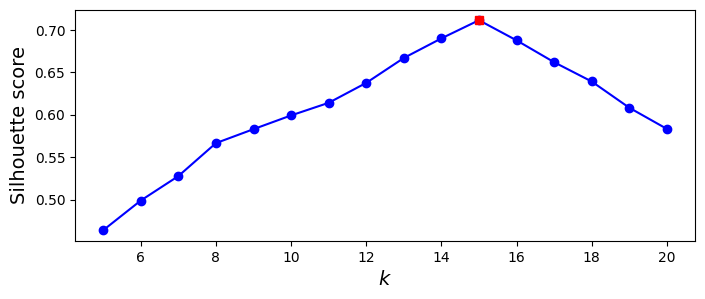

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_transform, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [ ]:
best_k

15

In [ ]:
best_index

10

In [ ]:
best_score

0.711278614093076

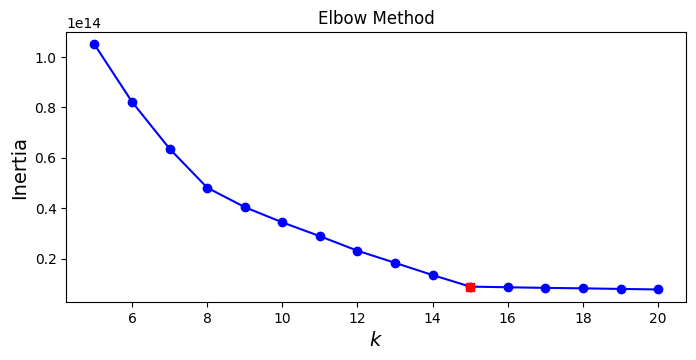

In [ ]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.title("Elbow Method")
plt.plot(best_k, best_inertia, "rs")
plt.show()

In [ ]:
best_model = kmeans_per_k[best_index]
best_model

KMeans(n_clusters=15, random_state=42)

In [ ]:
#Lengkapi Code di bawah ini sehingga menghasilkan evaluasi jumlah cluster terbaik
#Contoh pemanggilan Library CLustering
#from sklearn.cluster import KMeans

#START CODE
kmeans = cluster.KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_transform)
label = best_model.labels_
#END CODE

score = silhouette_score(X_transform, label)
print("silhouette score=",score)

silhouette score= 0.711278614093076


## Proses Visualisasi hasil CLuster

In [ ]:
#Proses Visualisasi hasil cluster

#Pertama, masukkan dahulu label hasil clustering ke dalam data

result = X_transform.copy()

#START CODE
result['cluster'] = label
result.head()
#END CODE

,data1,data2,cluster
0,-107942.945155,117379.414713,5
1,-106289.469781,124406.147680,5
2,-37056.800108,109191.307459,5
3,-67034.088509,97321.051645,5
4,-56821.209990,155556.137395,5


In [ ]:
result["cluster"].value_counts()

8     352
11    351
3     351
12    349
10    345
7     341
13    340
14    335
6     334
1     329
0     327
2     319
9     316
4     314
5     297
Name: cluster, dtype: int64

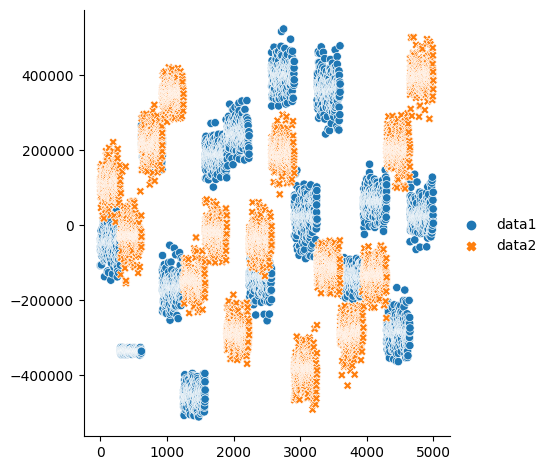

In [ ]:
#Lakukan Plotting terhadap data
import seaborn as sns

#Gunakan library seaborn, lebih mudah.

#START CODE
sns.relplot(X_transform)
#END CODE